# PCA and Eigendecomposition

## Steps

1. Generate bi-variate normal random numbers
2. Perform PCA on the bi-variate normal random numbers
3. Perform PCA step-by-step
4. Perform eigendecomposition step-by-step

## Generate bi-variate normal random numbers

Generate random numbers from the same multivariate normal distribution. Define $\mu$ and $\mathit{Cov}$, and generate $100$ random numbers.

Covariances of multivariate normal distributions, specified as a $d$-by-$d$ (here $d=2$) symmetric, positive semi-definite matrix $\mathit{Cov}$, the covariance matrix. The covariance matrix is diagonal, containing variances along the diagonal and the covariance off it.

In [252]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams["figure.facecolor"] ="white"

In [253]:
mu = np.array([2,3])
Cov = np.array([[2,1.5],[1.5,4]])
np.random.seed(1337)
R = np.random.multivariate_normal(mu,Cov,size = 100)
R = R.astype(np.float64)

Plot the random numbers.

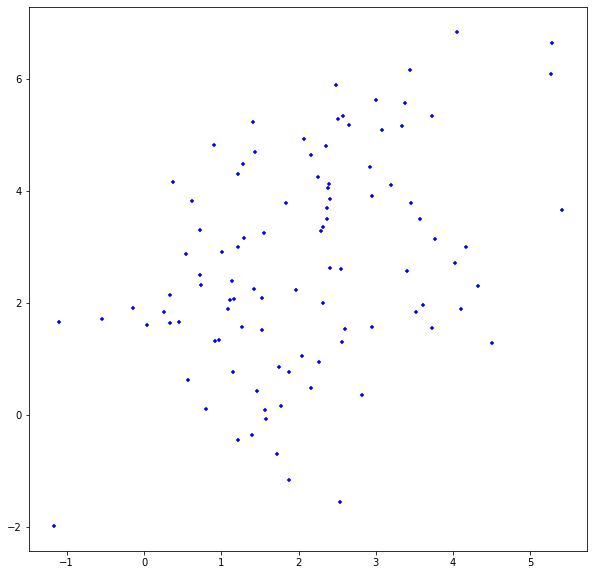

In [254]:
fig,ax = plt.subplots(1,1,figsize = (10,10))

ax.scatter(R[:,0],R[:,1],marker ="+",s = 20,color = "blue")
plt.show()

Check sample variance and covariance of the generated data points and the sample correlation between the variables.

In [255]:
Sample_cov = np.cov(R.T)
Cor = np.corrcoef(R.T)
print("Sample Covariance :\n {}".format(Sample_cov))
print("Sample Correlation :\n {}".format(Cor))

Sample Covariance :
 [[1.75756777 1.01884407]
 [1.01884407 3.61131405]]
Sample Correlation :
 [[1.         0.40440736]
 [0.40440736 1.        ]]


Covariance and variance: 
$$\mathit{Cov}(X,Y)=\frac{1}{n}\sum_{i=1}^n((x_i-\mu_X)(y_i-\mu_Y))$$
$$\mathit{Var}(X)=\mathit{Cov}(X,X)=\sigma_X^2$$ 

Pearson's coefficient of correlation $$\mathit{Cor}(X, Y)=\frac{\mathit{Cov}(X, Y)}{\sigma_X \sigma_Y}=\frac{\mathit{Cov}(X, Y)}{\sqrt{\mathit{Var}(X)} \sqrt{\mathit{Var}(Y)}}$$ 

In our example $\mathit{Cov}(X, Y)=1.0188$, $\mathit{Var}(X)=1.7576$, and $\mathit{Var}(Y)=3.611$. As expected:

In [256]:
r = 1.0188/(np.sqrt(1.7576)*np.sqrt(3.611))
print(r)

0.40440374628480535


## Perform PCA on the bi-variate normal random numbers

In [257]:
from sklearn.decomposition import PCA

In [258]:
pca = PCA(n_components=2)
pca.fit(R)
pca.explained_variance_
pca.explained_variance_ratio_

array([0.75654615, 0.24345385])

Check the correlation of the scores. As expected:

In [259]:
np.corrcoef(pca.transform(R).T)

array([[ 1.00000000e+00, -2.11568637e-16],
       [-2.11568637e-16,  1.00000000e+00]])

The eigenvectors are unit vectors and orthogonal, therefore the $2$-Norm is $1$ and the inner (scalar, dot) product is 0.

In [260]:
print(np.linalg.norm(pca.components_[:,0]))
print(np.linalg.norm(pca.components_[:,1]))
print(np.dot(pca.components_[:,0],pca.components_[:,1]))

1.0
1.0
0.0


Produce a biplot of the scores and loading vectors of the two principle components.

In [261]:
def biplot(ax,trans_R,components):
    ax.scatter(trans_R[:,0],trans_R[:,1],c = "red",s = 10)
    for v,vn in enumerate(["X","Y"]):
        ax.arrow(0,0,components[v,0],components[v,1], color = "blue")
        ax.text(components[v,0],components[v,1],s = vn,fontsize = 20)

    ax.axhline(0, color = "black",linewidth = 1)
    ax.axvline(0,color = "black",linewidth = 1)
    ax.set_xlabel("Component 1",fontsize = 20)
    ax.set_ylabel("Component 2",fontsize = 20)
    ax.set_aspect("equal")

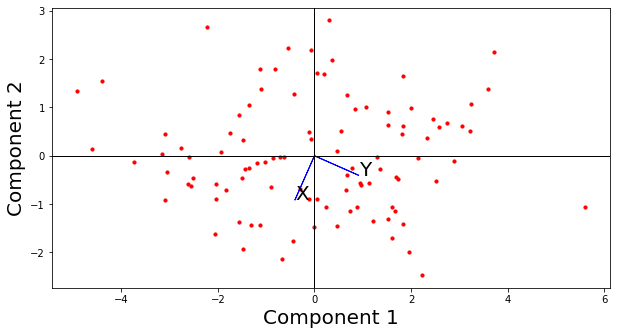

In [262]:
fig,ax = plt.subplots(1,1,figsize = (10,10))
trans_R = pca.transform(R)
biplot(ax,trans_R,pca.components_)
plt.show()

In [263]:
biplot(loading_vector,'scores',score,'varlabels',{'X','Y'});

TypeError: biplot() takes 3 positional arguments but 5 were given

## Perform PCA step-by-step

1. Center and Standardize, i.e., subtracting the mean of the data from the original dataset
2. Find the covariance matrix of the dataset
3. Find the eigenvectors associated with the greatest eigenvalues of the covariance matrix
4. Project the original dataset on the eigenvectors

### Standardize

Compute standard scores (commonly called $z$-scores) defined as $z_i=\frac{x_i-\mu_X}{\sigma_X}$.

In [ ]:
data = (R - np.mean(R,axis=0,keepdims=True)) / np.std(R,axis=0,keepdims=True)

### Find the covariance matrix 

As before. Check out the effect of standardization on the covariance matrix.

In [ ]:
Cov = np.cov(data.T)
Cov

### Find the eigenvectors and eigenvalues 

Recall the definition of eigenvectors $v$ and -values $\lambda$: $A v = \lambda v$, where $A$ is an $n$-by-$n$ matrix, $v$ is a column vector of length $n$, and $\lambda$ is a scalar.

In [ ]:
eigvals,loading_vector = np.linalg.eigh(Cov)
loading_vector,eigvals

Mind that the second eigenvalue of $1.41859$ is larger than the first eigenvalue of $0.60160$.

Lets check if $\mathit{Cov}\ v=\lambda v$ for the two eigenvectors and -values. As expected:

In [ ]:
assert np.all(np.dot(Cov,loading_vector[:,0]) == loading_vector[:,0]*eigvals[0])
assert np.all(np.dot(Cov,loading_vector[:,1]) == loading_vector[:,1]*eigvals[1])

The eigenvectors returned are unit vectors and orthogonal, therefore the $2$-Norm is $1$ and the inner (scalar, dot) product is 0.

In [ ]:
print(np.linalg.norm(pca.components_[:,0]))
print(np.linalg.norm(pca.components_[:,1]))
print(np.dot(pca.components_[:,0],pca.components_[:,1]))

### Project the original dataset on the eigenvectors

Compute the scores of the data points corresponding to the two principle components. Since the second eigenvalue of $1.41859$ is larger than the first eigenvalue of $0.60160$, we need to flip the scores left/right since the second column is first principle component (the one with the largest eigenvalue).

In `numpy`, the operation `A.T` computes the transpose $A^T$ of a matrix $A$.

Check the correlation of the scores. As expected:

In [ ]:
np.corrcoef(score.T)

Produce a biplot of the scores and loading vectors of the two principle components.

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
biplot(ax,score,loading_vector)

The eigenvalues of the covariance matrix indicate the variance in this (new) coordinate direction. We can use this information to calculate the relative variance explained by each component: for each component, we divide the variances according to the eigenvectors by the sum of the variances. In our example, the 1st and 2nd principal component contains $70.02$ and $20.78$ percent of the total variance in data.

In [ ]:
var_score= np.var(score,axis=0)
ratio_var_score = var_score / np.sum(var_score)
print(var_score)
print(ratio_var_score)

**Q:** *Why does this look differently compared to the plot when using the `pca` library? Fix the problem!*
<br>
**A:** : Because the `sklearn` pca package does not perform any z-transformation

In [268]:
Cov  = np.cov(R.T)
eigvals,loading_vector = np.linalg.eigh(Cov)
loading_vector = -loading_vector
score = np.dot(loading_vector,data.T)
score = score.T
score = np.fliplr(score)

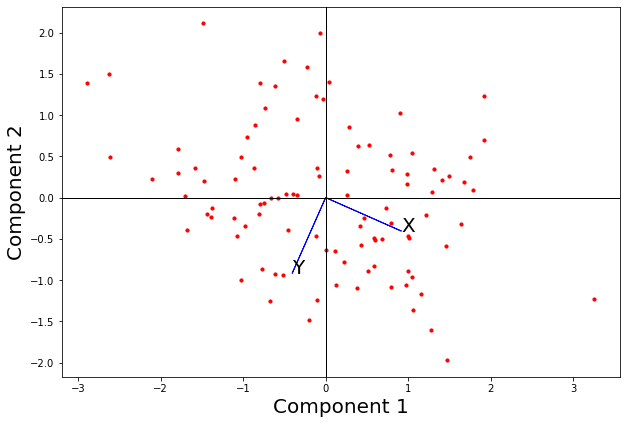

In [266]:
fig,ax = plt.subplots(1,1,figsize = (10,10))
biplot(ax,score,loading_vector)

## Perform eigendecomposition step-by-step

### Eigenvalues

We find the eigenvalues of an $n\times n$ (covariance) matrix $C$ by solving the so-called characteristic equation
$\det(C – \lambda I) = 0$ where $I$ is the identity matrix of size $n$.

Here $C=\mathit{Cov}$ is a $2\times 2$ matrix and the determinant of such a matrix is defiend as $\det(C)=c_{11}c_{22}-c_{12}c_{21}$. Hence, we need to solve:

\begin{align}
\det(\mathit{Cov} – \lambda I) &=(\mathit{Cov}_{11}-\lambda)(\mathit{Cov}_{22}-\lambda)-\mathit{Cov}_{12}\mathit{Cov}_{21}\\
    &=\lambda^2 -(\mathit{Cov}_{11}+\mathit{Cov}_{22})\lambda +\mathit{Cov}_{11}\mathit{Cov}_{22} -\mathit{Cov}_{12}\mathit{Cov}_{21}\\
    &=0
\end{align}

It's a quadriatic equation in $\lambda$ with, in general, two solutions.

In [269]:
a = 1
b = (Cov[0,0] + Cov[1,1])
c = Cov[0,0]*Cov[1,1] - Cov[0,1]*Cov[1,0]

p = b/2
q = np.sqrt(p**2 - c)
eigenvalues = [p + q, p - q]
print(eigenvalues)

[4.061806895117146, 1.307074925330878]


Let's test the two solutions $\lambda_1$ and $\lambda_2$. As expected:

In [271]:
print(eigvals[0] - eigenvalues[1])
print(eigvals[1] - eigenvalues[0])

-2.220446049250313e-16
0.0


### Eigenvectors

All that's left is to find the two eigenvectors $v_1, v_2$. We understand that by definition:

\begin{align}
Cv&=\lambda v\\
Cv-\lambda v&=0\\
Cv-\lambda I v&=0\\
(C-\lambda I) v&=0\\
\end{align}

This is nothing but solving a linear equation system.

Before, we compute the eigenvector $v_1$ associated with the eigenvalue $\lambda_1=1.6253$, we first, check if a solution exits. Therfore, we comput the rank, the determinat, and the reduced row echelon form of the matrix $A_1=C – \lambda_1 I$.

In `Matlab` the function `rref` computes the [reduced row echelon form](https://en.wikipedia.org/wiki/Row_echelon_form) of a matrix resulting from a [Gaussian elimination](https://en.wikipedia.org/wiki/Gaussian_elimination).

In [272]:
def red2dmat(A: np.ndarray)->np.ndarray:
    X = A.copy()
    X[0,:] = A[0,:] / A[0,0]
    X[1,:] = X[1,:] - X[0,:] * X[1,0]
    return X

In [273]:
from scipy.linalg import lu
A1 = Cov - np.eye(2)*eigenvalues[0]
A1_rank = np.linalg.matrix_rank(A1)
A1_det = np.linalg.det(A1)
A1_red = red2dmat(A1)

print(A1_rank)
print(A1_det)
print(A1_rref)

1
-1.5349315959395235e-15
[[ 1. -1.]
 [ 0.  0.]]


As we see, we have a *general* problem: the matrix $A_1$ is not fully ranked, hence, the linear equation system is underdetermined, i.e. we have infinitly many solution. Consequently, its deteminat is 0 and $A_1$ is, hence, not invertible.

However, the length and the orientation of an eigenvector $v$ are arbitrary. So we can set the last entry to anything, say $v_1(2) =1$, compute $v_1(1)$, and then fix the length of $v$ to get a unit vector. 

Let $𝐴_1$ be in reduced row echelon form, i.e. $A_1(i,i)=1$, and $v_1(2) =1$. The linear equation reduces to

\begin{align}
A_1(1,1)v_1(1) + A_1(1,2)v_1(2) & = 0\\
1v_1(1) + A_1(1,2)1 & = 0\\
v_1(1) + A_1(1,2) & = 0\\
v_1(1) & = - A_1(1,2) \\
\end{align}

To make it a unit length vector, we divide by the length ($2$-norm) of the vector.

In [274]:
v1 = np.array([-A1_red[0,1],1])
eigenvector1 = v1 / np.linalg.norm(v1)
print(eigenvector1)

[0.4043936  0.91458505]


Finally, we are ready to compute the eigenvector $v_2$ associated with the eigenvalue $\lambda_2=1.307$ in the same way.

In [276]:
A2 = Cov - np.eye(2)*eigenvalues[1]
A2_red = red2dmat(A2)
v2 = np.array([-A2_red[0,1],1])
eigenvector2 = v2 / np.linalg.norm(v2)
print(eigenvector2)

[-0.91458505  0.4043936 ]


## References

1. http://mres.uni-potsdam.de/index.php/2017/09/14/principal-component-analysis-in-6-steps/
2. https://www.youtube.com/watch?v=ssfMqFycXOU